In [6]:
import pandas as pd
import math

# Data Joining

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [22]:
#station_df = pd.read_csv('station_info.tsv', sep='\t')
foursqur_df = pd.read_csv('foursqur_info.tsv', sep='\t')
yelp_df = pd.read_csv('yelp_info.tsv', sep='\t')

In [ ]:
# join two dataframes from part 2 to remove repetitive locations
merged_df = foursqur_df.merge(yelp_df, on= ['latitude','longitude'])

In [50]:
# function to count number of POI(restaurants and bars) near each bike station.
from geopy.distance import geodesic 

def count_nearby_location(center_points, locations,radius):
    results_list = []

    for center_idx, center_point in center_points.items():
        count = 0

        for location in locations.values():
            
            distance = geodesic((center_point['latitude'],center_point['longitude']),(location['latitude'],location['longitude'])).meters

            if distance <= radius:
                count += 1

        results_list.append(count)

    return results_list 


In [47]:
# define a list of bike station location for center point
station_location = {'latitude':station_df['latitude'],
                     'longitude':station_df['longitude']}

station_loc_df = pd.DataFrame(station_location)

station_dic = {}

for index, row in station_loc_df.iterrows():
    station_dic[index] = {'latitude': row['latitude'],'longitude':row['longitude']}

type(station_dic)

dict

In [ ]:
# define a list of  yelp POI locatioins for locatioins
yelp_location = {'latitude':yelp_df['latitude'],
                     'longitude':yelp_df['longitude']}

yelp_loc_df = pd.DataFrame(yelp_location)

yelp_dic = {}

for index, row in yelp_loc_df.iterrows():
    yelp_dic[index] = {'latitude': row['latitude'],'longitude':row['longitude']}

type(yelp_dic)

In [ ]:
# define a list of foursquare POI locations for locations
foursqur_location = {'latitude':foursqur_df['latitude'],
                     'longitude':foursqur_df['longitude']}

foursqur_loc_df = pd.DataFrame(foursqur_location)

foursqur_dic = {}

for index, row in foursqur_loc_df.iterrows():
    foursqur_dic[index] = {'latitude': row['latitude'],'longitude':row['longitude']}

type(foursqur_dic)

In [ ]:
# return list of nearby POI count for foursquare
results = count_nearby_location(center_points=station_dic,locations=foursqur_dic,radius=1000)

In [ ]:
# return list of neaby POI count for yelp
yelp_results = count_nearby_location(center_points=station_dic,locations=yelp_dic,radius=1000)

In [ ]:
# add the list into station dataframe
station_df['Yelp_poi_count'] = yelp_results
station_df.head()

In [11]:
station_df = pd.read_csv('poi_count.tsv', sep='\t')
station_df.head()

,Unnamed: 0,Unnamed: 0.1,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,timestamp,foursquare_num_poi,Yelp_poi_count
0,0,0,Toronto,Queen St E / Woodward Ave,12,19,5,0,43.665269,-79.319796,2023-06-05T15:38:08.527000Z,0,178
1,1,1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,43.671420,-79.445947,2023-06-05T15:38:08.527000Z,0,144
2,2,2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,43.666224,-79.317693,2023-06-05T15:38:08.528000Z,0,157
3,3,3,Toronto,Bond St / Queen St E,8,25,16,0,43.653236,-79.376716,2023-06-05T15:38:08.533000Z,0,1317
4,4,4,Toronto,Church St / Alexander St,12,15,2,0,43.663722,-79.380288,2023-06-05T15:38:08.534000Z,0,1004


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

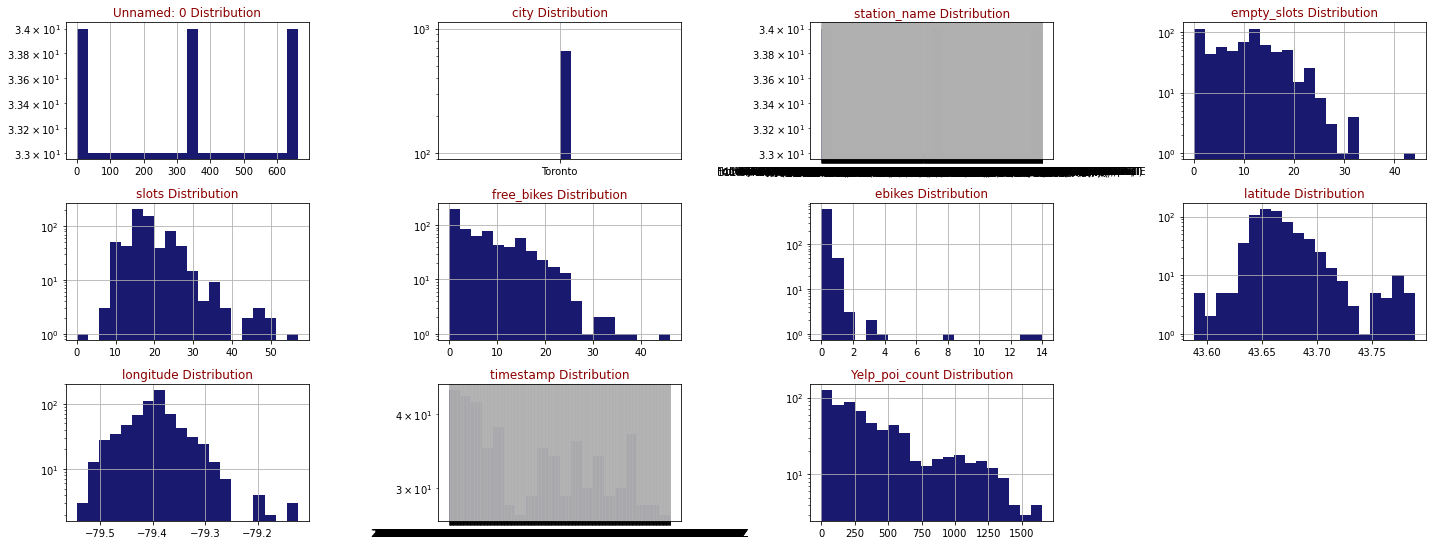

In [82]:
import matplotlib.pyplot as plt

# graph the data to visualize
def get_histograms(dataframe, features, rows, cols):

    fig=plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):

        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
        
    fig.tight_layout()  
    plt.show()

get_histograms(station_df,station_df.columns,8,4)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [36]:
import sqlite3
from sqlite3 import Error

# create connection to new database
def create_connection(path):
    connetion = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")

    except Error as e:
        print(f"The error'{e}'eccured")

    return connection

In [41]:
path = '/Users/siyimo/Desktop/citybike_database.db'
connection = create_connection(path=path)

Connection to SQLite DB successful


In [40]:
# execute query
def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print('Query executed successfully')
    except Error as e:
        print(f"The error '{e}' occured")

In [43]:
create_station_table = """
CREATE TABLE IF NOT EXISTS station (
    city TEXT NOT NULL,
        station_name TEXT PRIMARY KEY,
        empty_slots INTEGER NOT NULL,
        total_slots INTEGER NOT NULL,
        free_bikes INTEGER NOT NULL,
        ebikes INTEGER NOT NULL,
        latitude REAL NOT NULL,
        longitude REAL NOT NULL, 
        POI_count INTEGER NOT NULL
);
"""

In [44]:
# add sation table into database
execute_query(connection=connection,query=create_station_table)

Query executed successfully


In [45]:
create_foursqure_query = """
CREATE TABLE IF NOT EXISTS FOURSQURE(
    ID TEXT PRIMARY KEY,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    category TEXT NOT NULL
);
"""

In [46]:
# add foursquare table into databse
execute_query(connection=connection,query=create_foursqure_query)

Query executed successfully


In [47]:
create_yelp_query = """
CREATE TABLE IF NOT EXISTS YELP(
    ID TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    is_closed TEXT NOT NULL,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    address TEXT NOT NULL,
    rating INTEGER NOT NULL,
    category TEXT NOT NULL
);"""

In [48]:
# add yelp table into databse
execute_query(connection=connection,query=create_yelp_query)

Query executed successfully


Look at the data before and after the join to validate your data.

In [83]:
# filter column before importing to table
yelp_df = yelp_df.drop('Unnamed: 0', axis=1)
yelp_df.head()


,id,name,is_closed,latitude,longitude,address,rating,categories
0,oWTn2IzrprsRkPfULtjZtQ,The Burger's Priest,False,43.666700,-79.315585,1636 Queen Street E,3.5,Burgers
1,2aIgbnGUg8VC0u9iXO-wnQ,O Sushi,False,43.666540,-79.316930,6 Coxwell Avenue,3.5,Sushi Bars
2,yP71_LfUPnGIRqA2g09RoQ,Lake Inez,False,43.672340,-79.320640,1471 Gerrard Street E,4.5,Bars
3,Ohengzi4viLEXqhK50aLxg,Jaclyn's,False,43.666270,-79.318020,1588 Queen Street E,4.5,Caribbean
4,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,False,43.666561,-79.316422,1614 Queen Street E,3.5,Mexican


In [84]:
# filter column before importing to table
station_df = station_df.drop('Unnamed: 0', axis=1)
station_df.head()

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,Yelp_poi_count
0,Toronto,Queen St E / Woodward Ave,12,19,5,0,43.665269,-79.319796,178
1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,43.671420,-79.445947,144
2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,43.666224,-79.317693,157
3,Toronto,Bond St / Queen St E,8,25,16,0,43.653236,-79.376716,1317
4,Toronto,Church St / Alexander St,12,15,2,0,43.663722,-79.380288,1004


In [80]:
# inserting station records
station_df.to_sql('station',con=connection,if_exists='replace',index=False)

In [64]:
# inserting foursquare records
foursqur_df.to_sql('FOURSQURE',con=connection,if_exists='replace',index=False)

In [85]:
# inserting yelp records
yelp_df.to_sql('YELP',con=connection,if_exists='replace',index=False)